In [5]:
import pandas as pd
from lifespan_estimation_functions import *
from sklearn.model_selection import cross_val_score, train_test_split

In [18]:
csv = '../lifespan_merged_datasets/mergedworms_companyDrug.csv'# Read the CSV file
data = pd.read_csv(csv)

np.random.seed(41)

In [19]:
csv2 = '../lifespan_merged_datasets/mergedworms_terbinafin.csv'# Read the CSV file
data2 = pd.read_csv(csv2)
data2.loc[data2['drugged'] == 2, 'drugged'] = 1
np.random.seed(40)

## CompanyDrug Lifespan Estimation

           model  mse_mean   mse_std   r2_mean    r2_std
0         linear  2.620935  1.172606  0.583793  0.108293
1  random_forest  4.176291  2.248942  0.335490  0.312077
2        xgboost  3.788749  1.905249  0.398540  0.251969
3     elasticnet  2.799075  1.425934  0.551910  0.165500


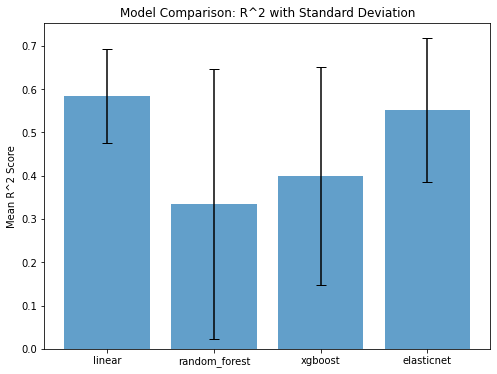

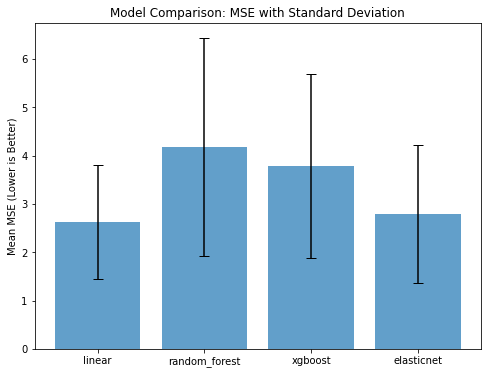

In [20]:
results = []
models = ["linear", "random_forest", "xgboost", "elasticnet"]

for model in models:
    result = evaluate_model_kfold(data, model_select=model)
    results.append(result)

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

plt.figure(figsize=(8, 6))
plt.bar(results_df["model"], results_df["r2_mean"], yerr=results_df["r2_std"], capsize=5, alpha=0.7)
plt.ylabel("Mean R^2 Score")
plt.title("Model Comparison: R^2 with Standard Deviation")
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(results_df["model"], results_df["mse_mean"], yerr=results_df["mse_std"], capsize=5, alpha=0.7)
plt.ylabel("Mean MSE (Lower is Better)")
plt.title("Model Comparison: MSE with Standard Deviation")
plt.show()

## Terbinafin Lifespan Estimation

           model  mse_mean   mse_std   r2_mean    r2_std
0         linear  7.525861  2.059594 -0.518187  0.677508
1  random_forest  8.732201  2.439166 -0.777980  0.753979
2        xgboost  8.225300  2.043637 -0.690520  0.745694
3     elasticnet  7.247124  2.002033 -0.456860  0.649259


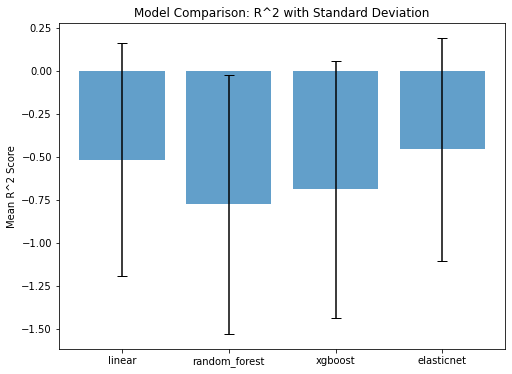

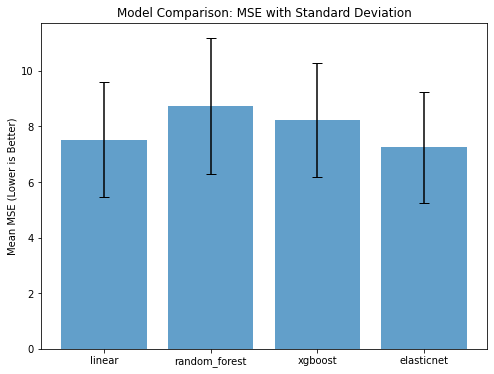

In [21]:
results2 = []
models = ["linear", "random_forest", "xgboost", "elasticnet"]

for model in models:
    result = evaluate_model_kfold(data2, model_select=model)
    results2.append(result)

# Convert to DataFrame
results2_df = pd.DataFrame(results2)
print(results2_df)

plt.figure(figsize=(8, 6))
plt.bar(results2_df["model"], results2_df["r2_mean"], yerr=results2_df["r2_std"], capsize=5, alpha=0.7)
plt.ylabel("Mean R^2 Score")
plt.title("Model Comparison: R^2 with Standard Deviation")
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(results2_df["model"], results2_df["mse_mean"], yerr=results2_df["mse_std"], capsize=5, alpha=0.7)
plt.ylabel("Mean MSE (Lower is Better)")
plt.title("Model Comparison: MSE with Standard Deviation")
plt.show()

## Combined Lifespan Estimation

In [2]:
import pandas as pd

csv3 = '../lifespan_merged_datasets/mergedworms_final.csv'# Read the CSV file
data3 = pd.read_csv(csv3)

np.random.seed(40)

NameError: name 'np' is not defined

           model  mse_mean   mse_std   r2_mean    r2_std
0         linear  7.013116  2.320265  0.040944  0.101584
1  random_forest  6.908435  2.062246 -0.002536  0.313231
2        xgboost  6.394484  2.272537  0.100663  0.239292
3     elasticnet  6.786346  2.793962  0.095073  0.060459


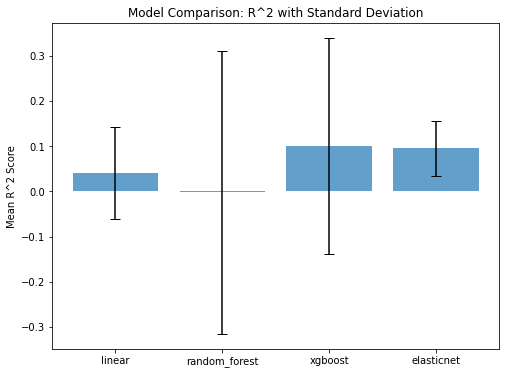

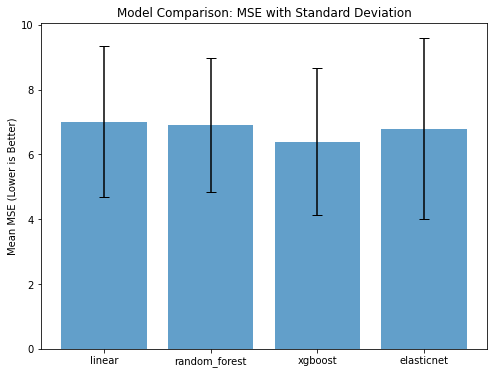

In [23]:
results3 = []
models = ["linear", "random_forest", "xgboost", "elasticnet"]

for model in models:
    result = evaluate_model_kfold(data3, model_select=model)
    results3.append(result)

# Convert to DataFrame
results3_df = pd.DataFrame(results3)
print(results3_df)

plt.figure(figsize=(8, 6))
plt.bar(results3_df["model"], results3_df["r2_mean"], yerr=results3_df["r2_std"], capsize=5, alpha=0.7)
plt.ylabel("Mean R^2 Score")
plt.title("Model Comparison: R^2 with Standard Deviation")
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(results3_df["model"], results3_df["mse_mean"], yerr=results3_df["mse_std"], capsize=5, alpha=0.7)
plt.ylabel("Mean MSE (Lower is Better)")
plt.title("Model Comparison: MSE with Standard Deviation")
plt.show()

In [14]:
import pandas as pd
from lifespan_estimation_functions import *

### First 10 groups / intervals

In [ ]:
# Read the CSV file
data = pd.read_csv('../lifespan_merged_datasets/mergedworms3.csv')

# Ensure the data is sorted by worm_id and group
data = data.sort_values(by=["worm_id", "group"])

# for i in range(5,20,2):
# Filter to keep only the first 10 groups per worm_id
filtered_data = data.groupby("worm_id").head(i)

# Aggregate the filtered data
aggregated_data = filtered_data.groupby("worm_id").agg({
    "worm_id": "first",
    "group": "first",  # Assuming group is constant per worm
    "average_speed": ["mean", "median", "min", "max"],
    "maximal_distance_traveled": "max",  # Keep max as it may capture peaks
    "average_change_in_pixels": ["mean", "std", "median", "min", "max"],
    "average_angular_speed": ["mean", "std", "min", "max"],
    "distance_traveled_bin": ["std"],
    "time_elapsed_(hours)": "max",  # Keep max as it's likely cumulative
    "std_speed": "mean",  # Capture average variability
    "std/mean": "mean",  # Keep mean of std/mean as a ratio metric
    "roaming_fraction": "mean",  # Capture average roaming behavior
    "lifespan": "first",  # Lifespan is constant per worm
    "drugged1": "first",  # Assuming drugged is constant per worm
    "drugged2": "first"  # Assuming drugged is constant per worm
    # "drugged": "first"  # Assuming drugged is constant per worm
})

aggregated_data.columns = ["_".join(col).strip() for col in aggregated_data.columns]
aggregated_data.rename(columns={"lifespan_first": "lifespan", "worm_id_first": "worm_id", "time_elapsed_(hours)_max": "time_elapsed_(hours)"}, inplace=True)


print_data = aggregated_data['maximal_distance_traveled_max', 'drugged1_first', 'drugged2_first', 'lifespan']
print(print_data)

    # aggregated_data.columns = ["_".join(col).strip() for col in aggregated_data.columns]
    # aggregated_data.rename(columns={"lifespan_first": "lifespan", "worm_id_first": "worm_id", "time_elapsed_(hours)_max": "time_elapsed_(hours)"}, inplace=True)

    # results = []
    # models = ["linear", "random_forest", "xgboost", "elasticnet"]

    # for model in models:
    #     result = evaluate_model_kfold(aggregated_data, model_select=model)
    #     results.append(result)

    # # Convert to DataFrame
    # results_df = pd.DataFrame(results)
    # print(f"For first {i} groups")
    # print(results_df)

    # plt.figure(figsize=(8, 6))
    # plt.bar(results_df["model"], results_df["r2_mean"], yerr=results_df["r2_std"], capsize=5, alpha=0.7)
    # plt.ylabel("Mean R^2 Score")
    # plt.title("Model Comparison: R^2 with Standard Deviation")
    # plt.show()

    # plt.figure(figsize=(8, 6))
    # plt.bar(results_df["model"], results_df["mse_mean"], yerr=results_df["mse_std"], capsize=5, alpha=0.7)
    # plt.ylabel("Mean MSE (Lower is Better)")
    # plt.title("Model Comparison: MSE with Standard Deviation")
    # plt.show()




KeyError: ('maximal_distance_traveled_max', 'drugged1_first', 'drugged2_first', 'lifespan')

In [3]:
aggregated_data.shape

(24, 23)

           model     mse_mean      mse_std      r2_mean       r2_std
0         linear  2664.162940  2968.114790 -1158.317739  1929.398323
1  random_forest     7.875483     5.174004    -0.394357     0.709360
2        xgboost    18.573018     9.055660    -2.921392     1.924222
3     elasticnet    17.720131    12.933241    -1.776305     1.484487


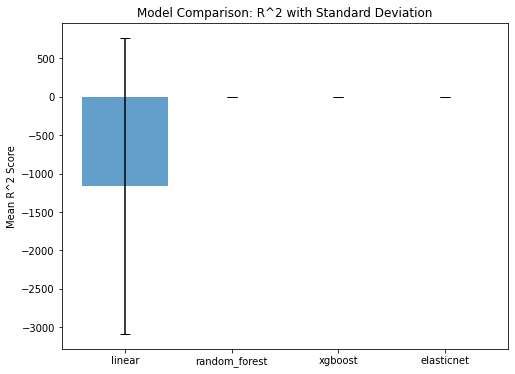

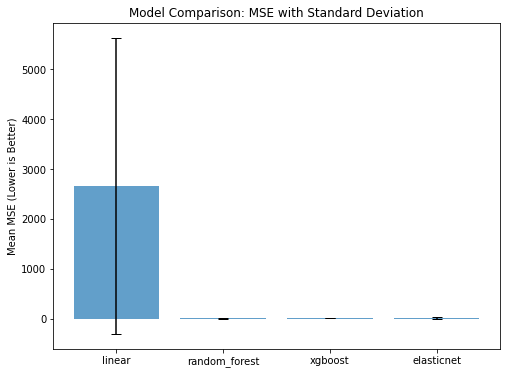

In [4]:
results = []
models = ["linear", "random_forest", "xgboost", "elasticnet"]

for model in models:
    result = evaluate_model_kfold(aggregated_data, model_select=model)
    results.append(result)

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

plt.figure(figsize=(8, 6))
plt.bar(results_df["model"], results_df["r2_mean"], yerr=results_df["r2_std"], capsize=5, alpha=0.7)
plt.ylabel("Mean R^2 Score")
plt.title("Model Comparison: R^2 with Standard Deviation")
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(results_df["model"], results_df["mse_mean"], yerr=results_df["mse_std"], capsize=5, alpha=0.7)
plt.ylabel("Mean MSE (Lower is Better)")
plt.title("Model Comparison: MSE with Standard Deviation")
plt.show()